# Регрессия IC50

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Загрузка данных и разделение на выборки

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
target = 'CC50, mM'

In [4]:
df = pd.read_parquet("data/processed_data_full.parquet")

In [5]:
df

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI
0,-1.732405,1.222549,0.851581,-0.772814,1.052557,0.284504,-1.522105,1.500099,-2.075118,-0.576677,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045,6.239374,175.482382,28.125000
1,-2.074548,2.091417,0.943841,-0.560001,1.232249,0.316257,-1.722757,1.238276,-2.223551,-0.566152,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045,0.771831,5.402819,7.000000
2,-2.477594,2.146889,0.949731,-1.510821,0.994298,0.773991,-1.089544,1.078060,-2.409092,-0.540065,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045,223.808778,161.142320,0.720000
3,-1.731419,1.242563,0.853706,-0.959234,0.968714,0.394969,-1.522105,1.500099,-2.167248,-0.576750,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,3.119291,-0.084045,1.705624,107.855654,63.235294
4,-1.715364,0.530810,0.778129,-0.717729,0.548297,0.930745,-1.336166,1.977954,-2.253237,-0.576068,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,107.131532,139.270991,1.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,0.636029,-0.787198,0.308399,-0.936087,1.540346,0.519892,0.634955,-0.805298,-0.036641,-0.455162,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,31.000104,34.999650,1.129017
994,0.847612,-0.892065,0.167966,-0.998958,1.179465,1.079648,0.709726,-0.790893,-0.234551,-0.455160,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,31.999934,33.999415,1.062484
995,0.955251,-0.914547,0.198520,-1.397599,0.977489,1.553108,0.712233,-0.790785,0.065439,0.617677,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,30.999883,33.999458,1.096761
996,0.906465,-0.203625,-0.278284,-0.941713,0.743712,1.371138,0.593365,-0.807503,-1.601738,-0.458386,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,31.998959,32.999644,1.031272


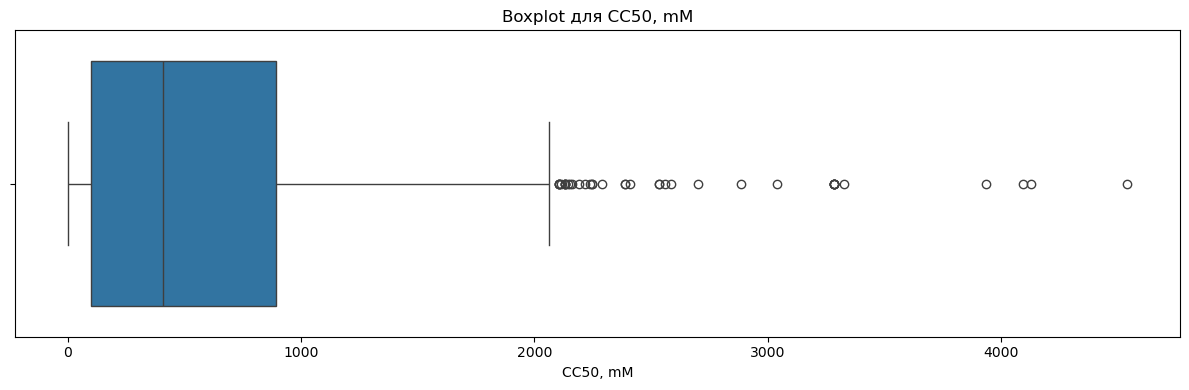

In [6]:
plt.figure(figsize=(12, 4))

sns.boxplot(x=df[target])

plt.title(f'Boxplot для {target}')
plt.tight_layout()
plt.show()

In [7]:
df["log_10_IC50, mM"] = np.log10(df[target])

In [8]:
target_old = target
target = "log_10_IC50, mM"

In [9]:
mean = df[target].mean()
std = df[target].std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

outliers = df[(df[target] < lower_bound) | (df[target] > upper_bound)]

print("Выбросы по правилу 3 сигм:")
outliers

Выбросы по правилу 3 сигм:


,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,"log_10_IC50, mM"
502,0.660964,-0.712371,-2.242725,-1.110805,-1.368646,-0.025201,1.537720,1.003525,0.674116,0.612560,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,0.275104,0.810833,2.947368,-0.091069
667,0.727695,-0.774454,0.478531,-0.580338,-1.048174,0.377927,0.169221,0.608875,-0.877419,0.615416,...,-0.03167,-0.03167,-0.234453,3.641036,-0.168855,-0.084045,0.471609,1.664502,3.529412,0.221284
752,-1.361850,0.707797,0.796922,-0.090165,2.416072,-1.553542,-1.697266,1.085209,-1.346448,-0.578991,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,60.996734,0.700808,0.011489,-0.154401
753,-1.361850,0.707797,0.796922,-0.090165,2.416072,-1.553542,-1.697266,1.085209,-1.346448,-0.578991,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,11.001362,0.700808,0.063702,-0.154401
783,0.339732,-0.708292,0.344044,0.519138,-0.371195,-0.284410,0.754228,-0.726871,0.920526,-0.458852,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,0.108830,0.800223,7.352941,-0.096789
784,0.339732,-0.708292,0.344044,0.519138,-0.371195,-0.284410,0.754228,-0.726871,0.920526,-0.458852,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,2.999235,0.800223,0.266809,-0.096789
785,0.339732,-0.708292,0.344044,0.519138,-0.371195,-0.284410,0.754228,-0.726871,0.920526,-0.458852,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,29.000074,0.800223,0.027594,-0.096789
786,0.339732,-0.708292,0.344044,0.519138,-0.371195,-0.284410,0.754228,-0.726871,0.920526,-0.458852,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,1.501218,0.800223,0.533049,-0.096789
787,0.339732,-0.708292,0.344044,0.519138,-0.371195,-0.284410,0.754228,-0.726871,0.920526,-0.458852,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,16.001255,0.700995,0.043809,-0.154285
788,0.339732,-0.708292,0.344044,0.519138,-0.371195,-0.284410,0.754228,-0.726871,0.920526,-0.458852,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,21.001047,0.700995,0.033379,-0.154285


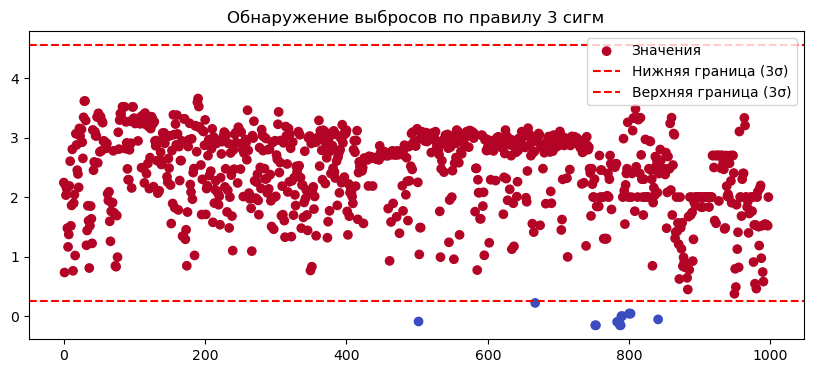

In [10]:
df['is_outlier_3σ'] = (df[target] < lower_bound) | (df[target] > upper_bound)

plt.figure(figsize=(10, 4))
plt.scatter(df.index, df[target], c=~df['is_outlier_3σ'], cmap='coolwarm', label='Значения')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Нижняя граница (3σ)')
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Верхняя граница (3σ)')
plt.legend()
plt.title('Обнаружение выбросов по правилу 3 сигм')
plt.show()

In [11]:
Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df["is_outlier_IQR"] = (df[target] < lower_bound) | (df[target] > upper_bound)
df[(df[target] < lower_bound) | (df[target] > upper_bound)]

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,"log_10_IC50, mM",is_outlier_3σ,is_outlier_IQR
502,0.660964,-0.712371,-2.242725,-1.110805,-1.368646,-0.025201,1.537720,1.003525,0.674116,0.612560,...,-0.234453,-0.274647,-0.168855,-0.084045,0.275104,0.810833,2.947368,-0.091069,True,True
667,0.727695,-0.774454,0.478531,-0.580338,-1.048174,0.377927,0.169221,0.608875,-0.877419,0.615416,...,-0.234453,3.641036,-0.168855,-0.084045,0.471609,1.664502,3.529412,0.221284,True,True
752,-1.361850,0.707797,0.796922,-0.090165,2.416072,-1.553542,-1.697266,1.085209,-1.346448,-0.578991,...,-0.234453,-0.274647,-0.168855,-0.084045,60.996734,0.700808,0.011489,-0.154401,True,True
753,-1.361850,0.707797,0.796922,-0.090165,2.416072,-1.553542,-1.697266,1.085209,-1.346448,-0.578991,...,-0.234453,-0.274647,-0.168855,-0.084045,11.001362,0.700808,0.063702,-0.154401,True,True
783,0.339732,-0.708292,0.344044,0.519138,-0.371195,-0.284410,0.754228,-0.726871,0.920526,-0.458852,...,-0.234453,-0.274647,-0.168855,-0.084045,0.108830,0.800223,7.352941,-0.096789,True,True
784,0.339732,-0.708292,0.344044,0.519138,-0.371195,-0.284410,0.754228,-0.726871,0.920526,-0.458852,...,-0.234453,-0.274647,-0.168855,-0.084045,2.999235,0.800223,0.266809,-0.096789,True,True
785,0.339732,-0.708292,0.344044,0.519138,-0.371195,-0.284410,0.754228,-0.726871,0.920526,-0.458852,...,-0.234453,-0.274647,-0.168855,-0.084045,29.000074,0.800223,0.027594,-0.096789,True,True
786,0.339732,-0.708292,0.344044,0.519138,-0.371195,-0.284410,0.754228,-0.726871,0.920526,-0.458852,...,-0.234453,-0.274647,-0.168855,-0.084045,1.501218,0.800223,0.533049,-0.096789,True,True
787,0.339732,-0.708292,0.344044,0.519138,-0.371195,-0.284410,0.754228,-0.726871,0.920526,-0.458852,...,-0.234453,-0.274647,-0.168855,-0.084045,16.001255,0.700995,0.043809,-0.154285,True,True
788,0.339732,-0.708292,0.344044,0.519138,-0.371195,-0.284410,0.754228,-0.726871,0.920526,-0.458852,...,-0.234453,-0.274647,-0.168855,-0.084045,21.001047,0.700995,0.033379,-0.154285,True,True


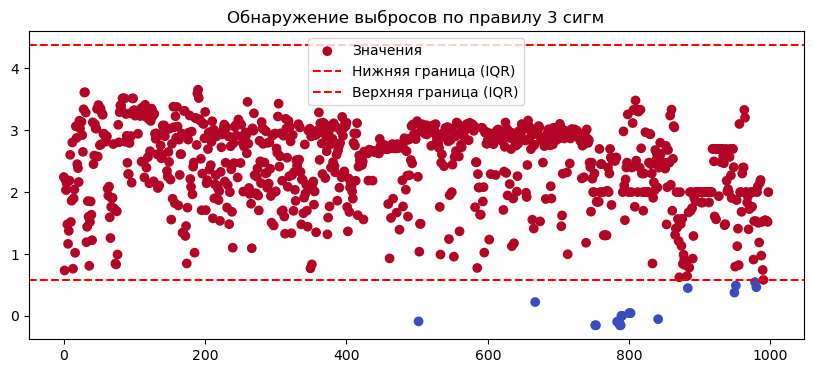

In [12]:
plt.figure(figsize=(10, 4))
plt.scatter(df.index, df[target], c=~df['is_outlier_IQR'], cmap='coolwarm', label='Значения')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Нижняя граница (IQR)')
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Верхняя граница (IQR)')
plt.legend()
plt.title('Обнаружение выбросов по правилу 3 сигм')
plt.show()

Как видно, распределение близко к нормальному, поэтому отбросим выбросы по правлу 3-х сигм

In [13]:
df

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,"log_10_IC50, mM",is_outlier_3σ,is_outlier_IQR
0,-1.732405,1.222549,0.851581,-0.772814,1.052557,0.284504,-1.522105,1.500099,-2.075118,-0.576677,...,-0.234453,-0.274647,2.297254,-0.084045,6.239374,175.482382,28.125000,2.244234,False,False
1,-2.074548,2.091417,0.943841,-0.560001,1.232249,0.316257,-1.722757,1.238276,-2.223551,-0.566152,...,-0.234453,-0.274647,2.297254,-0.084045,0.771831,5.402819,7.000000,0.732620,False,False
2,-2.477594,2.146889,0.949731,-1.510821,0.994298,0.773991,-1.089544,1.078060,-2.409092,-0.540065,...,-0.234453,-0.274647,2.297254,-0.084045,223.808778,161.142320,0.720000,2.207210,False,False
3,-1.731419,1.242563,0.853706,-0.959234,0.968714,0.394969,-1.522105,1.500099,-2.167248,-0.576750,...,-0.234453,-0.274647,3.119291,-0.084045,1.705624,107.855654,63.235294,2.032843,False,False
4,-1.715364,0.530810,0.778129,-0.717729,0.548297,0.930745,-1.336166,1.977954,-2.253237,-0.576068,...,-0.234453,-0.274647,-0.168855,-0.084045,107.131532,139.270991,1.300000,2.143861,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,0.636029,-0.787198,0.308399,-0.936087,1.540346,0.519892,0.634955,-0.805298,-0.036641,-0.455162,...,-0.234453,-0.274647,-0.168855,-0.084045,31.000104,34.999650,1.129017,1.544064,False,False
994,0.847612,-0.892065,0.167966,-0.998958,1.179465,1.079648,0.709726,-0.790893,-0.234551,-0.455160,...,-0.234453,-0.274647,-0.168855,-0.084045,31.999934,33.999415,1.062484,1.531471,False,False
995,0.955251,-0.914547,0.198520,-1.397599,0.977489,1.553108,0.712233,-0.790785,0.065439,0.617677,...,-0.234453,-0.274647,-0.168855,-0.084045,30.999883,33.999458,1.096761,1.531472,False,False
996,0.906465,-0.203625,-0.278284,-0.941713,0.743712,1.371138,0.593365,-0.807503,-1.601738,-0.458386,...,-0.234453,-0.274647,-0.168855,-0.084045,31.998959,32.999644,1.031272,1.518509,False,False


In [14]:
# data_cleaned_IQR = df[~df['is_outlier_IQR']].drop(columns=['is_outlier_IQR', 'is_outlier_3σ'])
data_cleaned_IQR = df[~df['is_outlier_3σ']].drop(columns=['is_outlier_IQR', 'is_outlier_3σ', target_old])

data_cleaned_IQR

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM",SI,"log_10_IC50, mM"
0,-1.732405,1.222549,0.851581,-0.772814,1.052557,0.284504,-1.522105,1.500099,-2.075118,-0.576677,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045,6.239374,28.125000,2.244234
1,-2.074548,2.091417,0.943841,-0.560001,1.232249,0.316257,-1.722757,1.238276,-2.223551,-0.566152,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045,0.771831,7.000000,0.732620
2,-2.477594,2.146889,0.949731,-1.510821,0.994298,0.773991,-1.089544,1.078060,-2.409092,-0.540065,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045,223.808778,0.720000,2.207210
3,-1.731419,1.242563,0.853706,-0.959234,0.968714,0.394969,-1.522105,1.500099,-2.167248,-0.576750,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,3.119291,-0.084045,1.705624,63.235294,2.032843
4,-1.715364,0.530810,0.778129,-0.717729,0.548297,0.930745,-1.336166,1.977954,-2.253237,-0.576068,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,107.131532,1.300000,2.143861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,0.636029,-0.787198,0.308399,-0.936087,1.540346,0.519892,0.634955,-0.805298,-0.036641,-0.455162,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,31.000104,1.129017,1.544064
994,0.847612,-0.892065,0.167966,-0.998958,1.179465,1.079648,0.709726,-0.790893,-0.234551,-0.455160,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,31.999934,1.062484,1.531471
995,0.955251,-0.914547,0.198520,-1.397599,0.977489,1.553108,0.712233,-0.790785,0.065439,0.617677,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,30.999883,1.096761,1.531472
996,0.906465,-0.203625,-0.278284,-0.941713,0.743712,1.371138,0.593365,-0.807503,-1.601738,-0.458386,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,31.998959,1.031272,1.518509


In [15]:
X = data_cleaned_IQR[data_cleaned_IQR.columns[:-3]]
y_ic50 = data_cleaned_IQR[target]

In [16]:
X

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,-1.732405,1.222549,0.851581,-0.772814,1.052557,0.284504,-1.522105,1.500099,-2.075118,-0.576677,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045
1,-2.074548,2.091417,0.943841,-0.560001,1.232249,0.316257,-1.722757,1.238276,-2.223551,-0.566152,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045
2,-2.477594,2.146889,0.949731,-1.510821,0.994298,0.773991,-1.089544,1.078060,-2.409092,-0.540065,...,6.406778,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045
3,-1.731419,1.242563,0.853706,-0.959234,0.968714,0.394969,-1.522105,1.500099,-2.167248,-0.576750,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,3.119291,-0.084045
4,-1.715364,0.530810,0.778129,-0.717729,0.548297,0.930745,-1.336166,1.977954,-2.253237,-0.576068,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,0.636029,-0.787198,0.308399,-0.936087,1.540346,0.519892,0.634955,-0.805298,-0.036641,-0.455162,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045
994,0.847612,-0.892065,0.167966,-0.998958,1.179465,1.079648,0.709726,-0.790893,-0.234551,-0.455160,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045
995,0.955251,-0.914547,0.198520,-1.397599,0.977489,1.553108,0.712233,-0.790785,0.065439,0.617677,...,-0.181542,3.676931,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045
996,0.906465,-0.203625,-0.278284,-0.941713,0.743712,1.371138,0.593365,-0.807503,-1.601738,-0.458386,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045


In [17]:
y_ic50

0      2.244234
1      0.732620
2      2.207210
3      2.032843
4      2.143861
         ...   
993    1.544064
994    1.531471
995    1.531472
996    1.518509
997    1.999998
Name: log_10_IC50, mM, Length: 982, dtype: float64

In [18]:
X_train, X_test, y_train_ic50, y_test_ic50 = train_test_split(
    X, y_ic50, test_size=0.15, random_state=42
)

## Инициализация моделей и метрик

In [19]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

In [20]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [21]:
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForest': RandomForestRegressor(random_state=RANDOM_STATE),
    'XGBoost': XGBRegressor(random_state=RANDOM_STATE),
    'SVR': SVR()
}

metrics = {
    'R2': r2_score,
    'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    'MAE': mean_absolute_error,
    'MAPE': mean_absolute_percentage_error
}

## Бейзлайн

Проверим линейные модели, деревья, а также SVR

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
results = []

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train_ic50, 
                               cv=5, scoring='r2', n_jobs=-1)
    
    model.fit(X_train, y_train_ic50)
    y_pred = model.predict(X_test)
    
    model_metrics = {metric_name: metric_func(y_test_ic50, y_pred) 
                     for metric_name, metric_func in metrics.items()}
    
    results.append({
        'model': name,
        'cv_mean_r2': np.mean(cv_scores),
        'cv_std_r2': np.std(cv_scores),
        **model_metrics
    })

results_df = pd.DataFrame(results)
print(results_df)

          model  cv_mean_r2  cv_std_r2        R2      RMSE       MAE      MAPE
0         Ridge   -0.087018   0.562813  0.418629  0.533409  0.415655  0.243324
1         Lasso   -0.010734   0.011536 -0.010342  0.703182  0.575028  0.364382
2  RandomForest    0.420310   0.057028  0.574683  0.456236  0.329396  0.199169
3       XGBoost    0.335226   0.119729  0.534096  0.477509  0.326569  0.190061
4           SVR    0.371838   0.080694  0.550173  0.469198  0.341297  0.207147


Как видно, деревья и SVR дают лучшие результаты.

Попробуем оптимизировать их с помощью подбора гиперпараметров

## Оптимизация

Будем оптимизировать при помощи Optuna

In [24]:
import optuna
from optuna.samplers import TPESampler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import joblib
import matplotlib.pyplot as plt

In [25]:
N_TRIALS_RF = 100
CV_FOLDS_RF = 10

N_TRIALS_XGB = 100
CV_FOLDS_XGB = 10

N_TRIALS_SVR = 30
CV_FOLDS_SVR = 5

### Random Forest

In [26]:
def optimize_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 5, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }
    
    model = RandomForestRegressor(
        **params,
        random_state=RANDOM_STATE,
        n_jobs=-1
    )
    
    r2_scores = cross_val_score(
        model, X_train, y_train_ic50, 
        cv=CV_FOLDS_RF, scoring='r2', n_jobs=-1
    )
    
    return np.mean(r2_scores)

In [27]:
study_rf = optuna.create_study(
    direction='maximize',
    sampler=TPESampler(seed=RANDOM_STATE)
)
study_rf.optimize(optimize_rf, n_trials=N_TRIALS_RF)

[I 2025-06-02 15:17:18,129] A new study created in memory with name: no-name-bbc88a9c-a4ed-48a0-9601-961d5205e500
[I 2025-06-02 15:17:20,555] Trial 0 finished with value: 0.44728928091850995 and parameters: {'n_estimators': 437, 'max_depth': 48, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.44728928091850995.
[I 2025-06-02 15:17:22,547] Trial 1 finished with value: 0.43457629233470796 and parameters: {'n_estimators': 641, 'max_depth': 37, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.44728928091850995.
[I 2025-06-02 15:17:23,828] Trial 2 finished with value: 0.4530234792012444 and parameters: {'n_estimators': 374, 'max_depth': 29, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 2 with value: 0.4530234792012444.
[I 2025-06-02 15:17:25,198] Trial 3 finished with value: 0.4307160

In [28]:
print(f"Лучшие параметры для Random Forest:")
print(study_rf.best_params)
print(f"Лучший R2: {study_rf.best_value:.4f}")

fig = optuna.visualization.plot_optimization_history(study_rf)
fig.show()

fig = optuna.visualization.plot_param_importances(study_rf)
fig.show()

Лучшие параметры для Random Forest:
{'n_estimators': 529, 'max_depth': 16, 'min_samples_split': 16, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}
Лучший R2: 0.4610


In [29]:
best_rf_model = RandomForestRegressor(
    **study_rf.best_params,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
best_rf_model.fit(X_train, y_train_ic50)

RandomForestRegressor(bootstrap=False, max_depth=16, max_features='sqrt',
                      min_samples_split=16, n_estimators=529, n_jobs=-1,
                      random_state=42)

#### Оценка модели на лучшем наборе данных

In [30]:
y_pred_best_rf = best_rf_model.predict(X_test)

final_metrics_rf = {metric_name: metric_func(y_test_ic50, y_pred_best_rf) 
                 for metric_name, metric_func in metrics.items()}

print("\nFinal Metrics on Test Set:")
for metric, value in final_metrics_rf.items():
    print(f"{metric}: {value:.4f}")


Final Metrics on Test Set:
R2: 0.5878
RMSE: 0.4492
MAE: 0.3250
MAPE: 0.2020


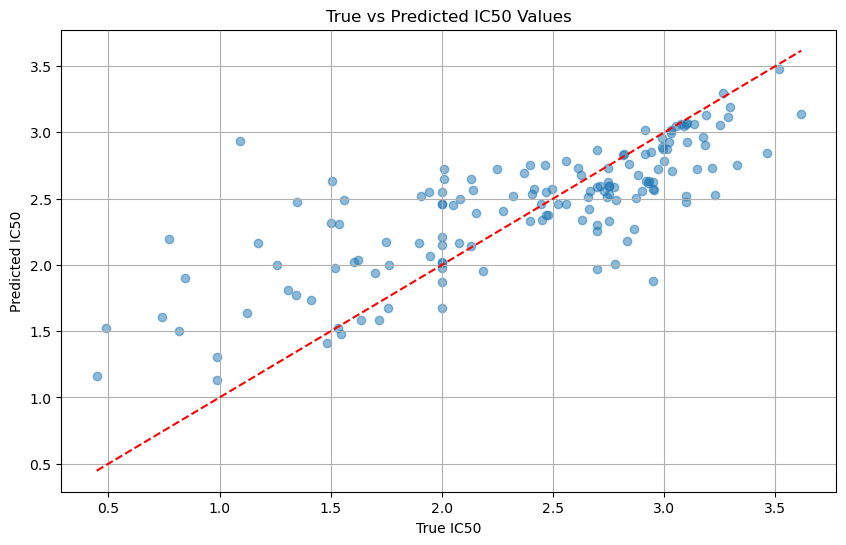

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_ic50, y_pred_best_rf, alpha=0.5)
plt.plot([min(y_test_ic50), max(y_test_ic50)], 
         [min(y_test_ic50), max(y_test_ic50)], 'r--')
plt.xlabel('True CC50')
plt.ylabel('Predicted CC50')
plt.title('True vs Predicted CC50 Values')
plt.grid(True)
plt.show()

#### Анализ важности признаков

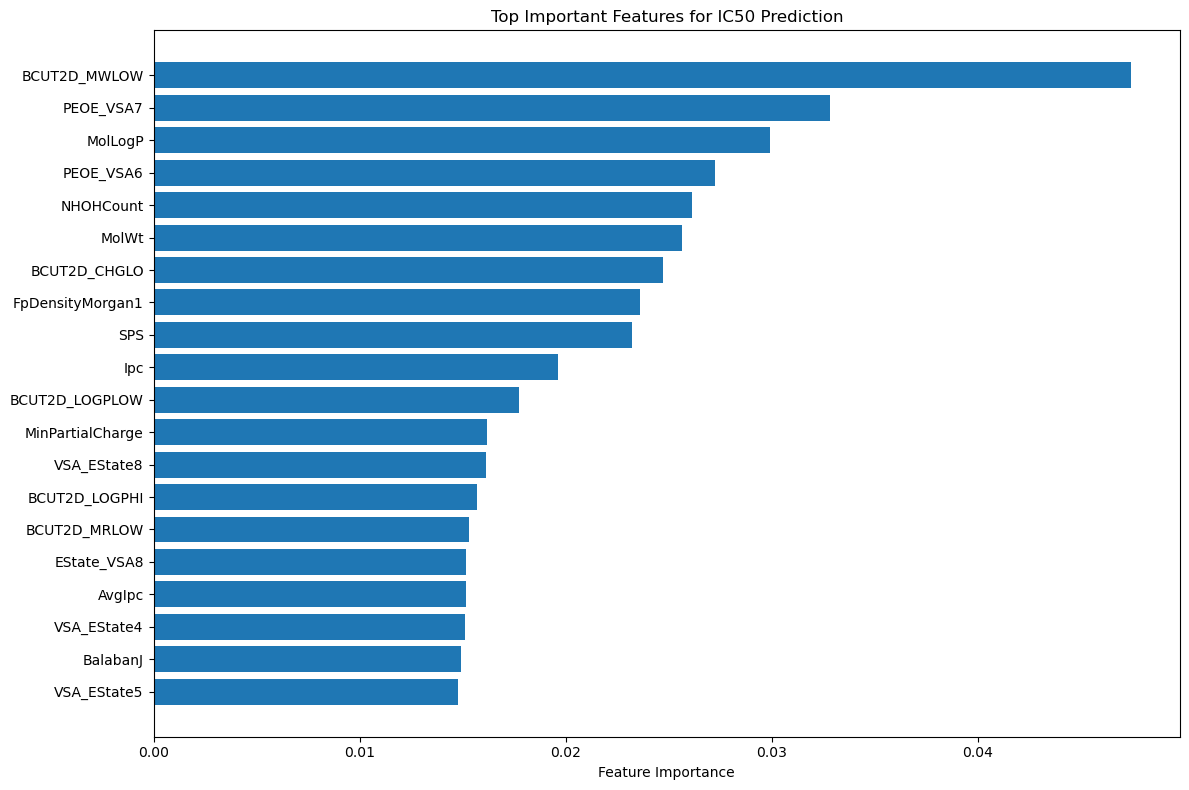

In [32]:
if hasattr(best_rf_model, 'feature_importances_'):
    importances = best_rf_model.feature_importances_
    feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]
    
    sorted_idx = importances.argsort()[::-1]
    top_features = 20
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(top_features), importances[sorted_idx][:top_features], align='center')
    plt.yticks(range(top_features), [feature_names[i] for i in sorted_idx[:top_features]])
    plt.gca().invert_yaxis()
    plt.xlabel('Feature Importance')
    plt.title('Top Important Features for CC50 Prediction')
    plt.tight_layout()
    plt.show()

### XGBoost

In [33]:
def optimize_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10)
    }
    
    model = XGBRegressor(
        **params,
        random_state=RANDOM_STATE,
        tree_method='exact',
        enable_categorical=False
    )
    
    r2_scores = cross_val_score(
        model, X_train, y_train_ic50, 
        cv=CV_FOLDS_XGB, scoring='r2', n_jobs=-1
    )
    
    return np.mean(r2_scores)


In [34]:
study_xgb = optuna.create_study(
    direction='maximize',
    sampler=TPESampler(seed=RANDOM_STATE)
)
study_xgb.optimize(optimize_xgb, n_trials=N_TRIALS_XGB)

[I 2025-06-02 15:20:27,943] A new study created in memory with name: no-name-2f8da2f3-4edd-42d2-96ba-f1a042015995
[I 2025-06-02 15:20:32,100] Trial 0 finished with value: 0.4220051054188613 and parameters: {'n_estimators': 437, 'max_depth': 12, 'learning_rate': 0.06504856968981275, 'subsample': 0.7993292420985183, 'colsample_bytree': 0.5780093202212182, 'gamma': 0.7799726016810132, 'reg_alpha': 0.5808361216819946, 'reg_lambda': 8.661761457749352}. Best is trial 0 with value: 0.4220051054188613.
[I 2025-06-02 15:20:40,252] Trial 1 finished with value: 0.27092633675830147 and parameters: {'n_estimators': 641, 'max_depth': 10, 'learning_rate': 0.001124579825911934, 'subsample': 0.9849549260809971, 'colsample_bytree': 0.9162213204002109, 'gamma': 1.0616955533913808, 'reg_alpha': 1.8182496720710062, 'reg_lambda': 1.8340450985343382}. Best is trial 0 with value: 0.4220051054188613.
[I 2025-06-02 15:20:43,410] Trial 2 finished with value: 0.4231690251082691 and parameters: {'n_estimators': 37

In [35]:
print(f"Лучшие параметры для XGBoost:")
print(study_xgb.best_params)
print(f"Лучший R2: {study_xgb.best_value:.4f}")

fig = optuna.visualization.plot_optimization_history(study_xgb)
fig.show()

fig = optuna.visualization.plot_param_importances(study_xgb)
fig.show()

Лучшие параметры для XGBoost:
{'n_estimators': 663, 'max_depth': 12, 'learning_rate': 0.011136119563652177, 'subsample': 0.6053281234260353, 'colsample_bytree': 0.705868674243541, 'gamma': 0.15416356018795727, 'reg_alpha': 0.27978110546106283, 'reg_lambda': 5.885623502312341}
Лучший R2: 0.4493


In [36]:
best_xgb_model = XGBRegressor(
    **study_xgb.best_params,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
best_xgb_model.fit(X_train, y_train_ic50)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.705868674243541, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=0.15416356018795727, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.011136119563652177,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=663, n_jobs=-1,
             num_parallel_tree=None, ...)

#### Оценка модели на лучшем наборе данных

In [37]:
y_pred_best_xgb = best_xgb_model.predict(X_test)

final_metrics_xgb = {metric_name: metric_func(y_test_ic50, y_pred_best_xgb) 
                 for metric_name, metric_func in metrics.items()}

print("\nFinal Metrics on Test Set:")
for metric, value in final_metrics_xgb.items():
    print(f"{metric}: {value:.4f}")


Final Metrics on Test Set:
R2: 0.5659
RMSE: 0.4609
MAE: 0.3338
MAPE: 0.1985


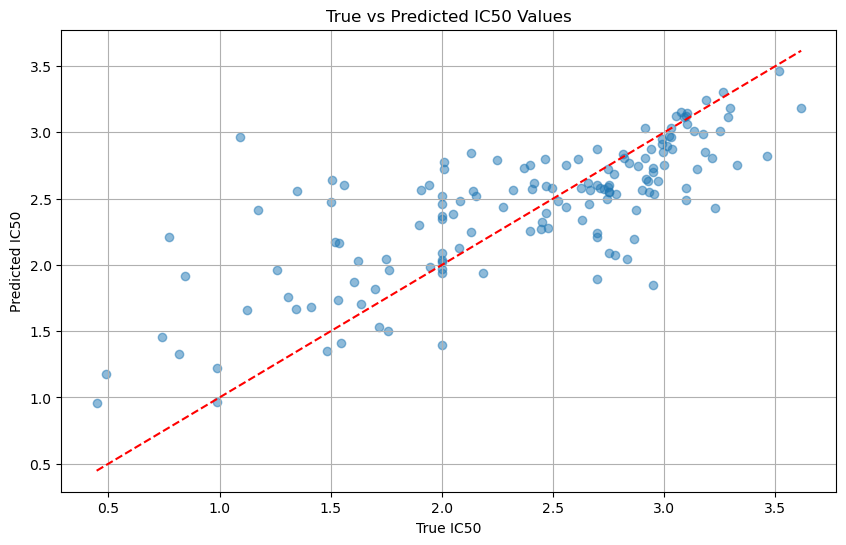

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_ic50, y_pred_best_xgb, alpha=0.5)
plt.plot([min(y_test_ic50), max(y_test_ic50)], 
         [min(y_test_ic50), max(y_test_ic50)], 'r--')
plt.xlabel('True CC50')
plt.ylabel('Predicted CC50')
plt.title('True vs Predicted CC50 Values')
plt.grid(True)
plt.show()

#### Анализ важности признаков

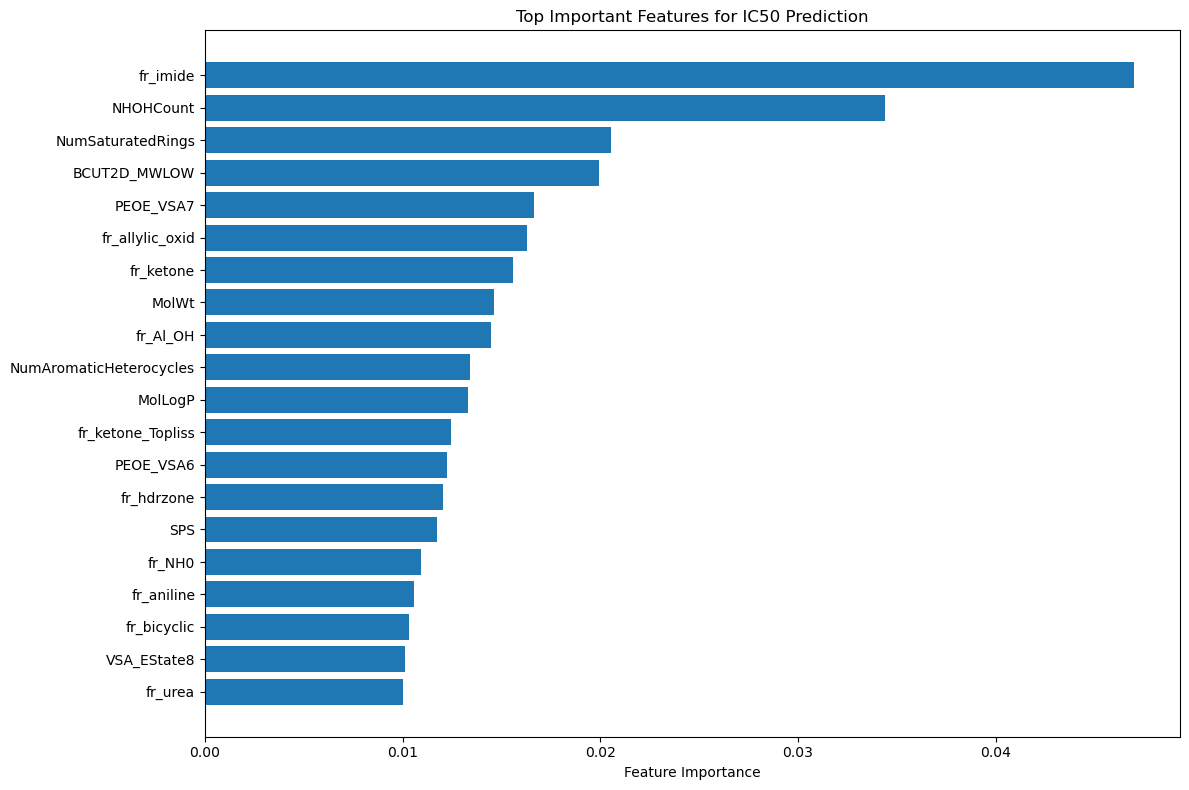

In [39]:
if hasattr(best_xgb_model, 'feature_importances_'):
    importances = best_xgb_model.feature_importances_
    feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]
    
    sorted_idx = importances.argsort()[::-1]
    top_features = 20
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(top_features), importances[sorted_idx][:top_features], align='center')
    plt.yticks(range(top_features), [feature_names[i] for i in sorted_idx[:top_features]])
    plt.gca().invert_yaxis()
    plt.xlabel('Feature Importance')
    plt.title('Top Important Features for CC50 Prediction')
    plt.tight_layout()
    plt.show()

### SVR

In [40]:
def optimize_svr(trial):
    params = {
        'C': trial.suggest_float('C', 0.1, 100, log=True),
        'epsilon': trial.suggest_float('epsilon', 0.001, 1, log=True),
        'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf']),
        'gamma': trial.suggest_float('gamma', 0.001, 10, log=True)
    }
    
    if params['kernel'] == 'poly':
        params['degree'] = trial.suggest_int('degree', 2, 5)
    
    model = SVR(**params)
    
    r2_scores = cross_val_score(
        model, X_train, y_train_ic50, 
        cv=CV_FOLDS_SVR, scoring='r2', n_jobs=-1
    )
    
    return np.mean(r2_scores)


In [41]:
study_svr = optuna.create_study(
    direction='maximize',
    sampler=TPESampler(seed=RANDOM_STATE)
)
study_svr.optimize(optimize_svr, n_trials=N_TRIALS_SVR)

[I 2025-06-02 15:30:13,052] A new study created in memory with name: no-name-36de83d8-08cf-4f72-97f4-98b8ca88cc19
[I 2025-06-02 15:30:13,286] Trial 0 finished with value: 0.05736524858672485 and parameters: {'C': 1.3292918943162164, 'epsilon': 0.7114476009343417, 'kernel': 'linear', 'gamma': 0.004207988669606638}. Best is trial 0 with value: 0.05736524858672485.
[I 2025-06-02 15:30:13,600] Trial 1 finished with value: -0.15088458309794192 and parameters: {'C': 0.2937538457632829, 'epsilon': 0.001493656855461764, 'kernel': 'linear', 'gamma': 0.6796578090758157}. Best is trial 0 with value: 0.05736524858672485.
[I 2025-06-02 15:30:13,649] Trial 2 finished with value: 0.16004713108937943 and parameters: {'C': 0.115279871282324, 'epsilon': 0.8123245085588684, 'kernel': 'linear', 'gamma': 0.005337032762603957}. Best is trial 2 with value: 0.16004713108937943.
[I 2025-06-02 15:30:14,011] Trial 3 finished with value: -0.16320633596088646 and parameters: {'C': 0.35498788321965025, 'epsilon': 0

In [42]:
print(f"Лучшие параметры для SVR:")
print(study_svr.best_params)
print(f"Лучший R2: {study_svr.best_value:.4f}")

fig = optuna.visualization.plot_optimization_history(study_svr)
fig.show()

fig = optuna.visualization.plot_param_importances(study_svr)
fig.show()

Лучшие параметры для SVR:
{'C': 9.360202634423718, 'epsilon': 0.32226893534413065, 'kernel': 'rbf', 'gamma': 0.0027824343619778902}
Лучший R2: 0.3535


In [43]:
best_svr_model = SVR(
    **study_svr.best_params
)
best_svr_model.fit(X_train, y_train_ic50)

SVR(C=9.360202634423718, epsilon=0.32226893534413065,
    gamma=0.0027824343619778902)

#### Оценка модели на лучшем наборе данных

In [44]:
y_pred_best_svr = best_svr_model.predict(X_test)

final_metrics_svr = {metric_name: metric_func(y_test_ic50, y_pred_best_svr) 
                 for metric_name, metric_func in metrics.items()}

print("\nFinal Metrics on Test Set:")
for metric, value in final_metrics_svr.items():
    print(f"{metric}: {value:.4f}")


Final Metrics on Test Set:
R2: 0.5723
RMSE: 0.4575
MAE: 0.3563
MAPE: 0.1889


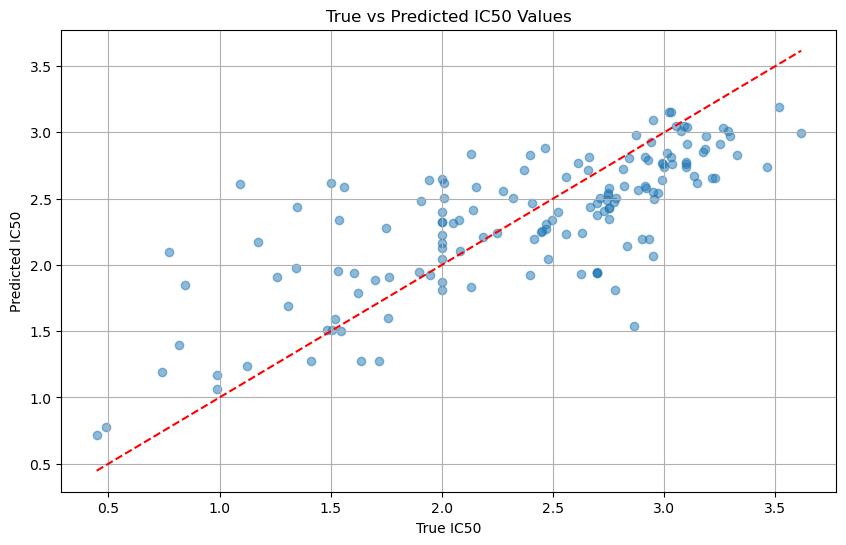

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_ic50, y_pred_best_svr, alpha=0.5)
plt.plot([min(y_test_ic50), max(y_test_ic50)], 
         [min(y_test_ic50), max(y_test_ic50)], 'r--')
plt.xlabel('True CC50')
plt.ylabel('Predicted CC50')
plt.title('True vs Predicted CC50 Values')
plt.grid(True)
plt.show()

#### Анализ важности признаков

In [ ]:
if hasattr(best_svr_model, 'feature_importances_'):
    importances = best_svr_model.feature_importances_
    feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]
    
    sorted_idx = importances.argsort()[::-1]
    top_features = 20
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(top_features), importances[sorted_idx][:top_features], align='center')
    plt.yticks(range(top_features), [feature_names[i] for i in sorted_idx[:top_features]])
    plt.gca().invert_yaxis()
    plt.xlabel('Feature Importance')
    plt.title('Top Important Features for CC50 Prediction')
    plt.tight_layout()
    plt.show()

## Сравнение моделей

In [47]:
metrics_comparisson = {
    "RF": final_metrics_rf,
    "XGB": final_metrics_xgb,
    "SVR": final_metrics_svr
}

df_metrics = pd.DataFrame(metrics_comparisson)

In [48]:
df_metrics

,RF,XGB,SVR
R2,0.587783,0.565914,0.572271
RMSE,0.449155,0.460916,0.457528
MAE,0.325011,0.333819,0.356314
MAPE,0.202046,0.198499,0.188871


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Th

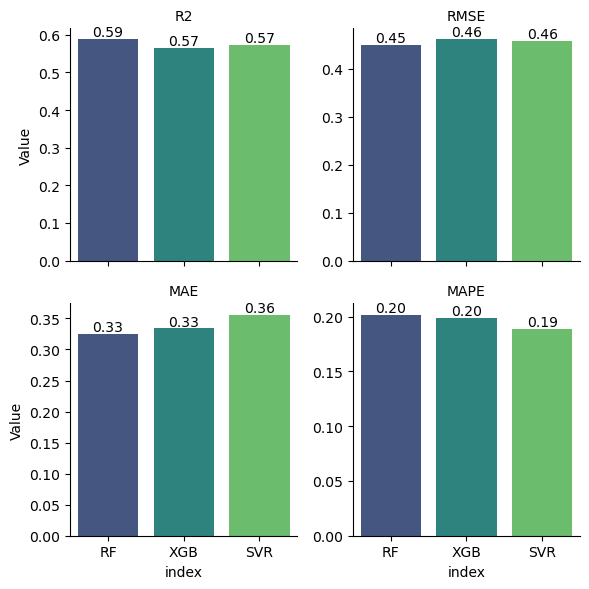

In [49]:
plot_data = df_metrics.T.reset_index().melt(id_vars='index', var_name='Metric', value_name='Value')

palette = sns.color_palette("viridis", n_colors=len(plot_data['index'].unique()))

g = sns.FacetGrid(plot_data, col="Metric", col_wrap=2, sharey=False)
g.map_dataframe(sns.barplot, x="index", y="Value", palette=palette, ci=None)
g.set_titles("{col_name}")

for ax in g.axes:
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

g.tight_layout()
plt.show()

Модели в целом идентичны